In [1]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import statsmodels.formula.api as smf

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib as mat
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar

#misc
import time
np.set_printoptions(suppress=True)


In [35]:
#load data
set_number = 5

dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/Run03/Set0'+str(set_number)+'/'
dir_save = '../../../Research/Images/Images/figureMar24/'


wind_load= 'wind0'+str(set_number)+'Run03_InterpolatedX.hdf'
wind_load_small = 'wind0'+str(set_number)+'Run03_InterpolatedXs.hdf'

windn = pd.read_hdf(dir+wind_load)
windsm = pd.read_hdf(dir+wind_load_small)

In [36]:
df = pd.DataFrame()
df = windsm
dt= df.master_time[1]-df.master_time[0]
sync_time = df.master_time-df.master_time[0]
df.insert(1,'time',sync_time)

(0.0, 11.0)

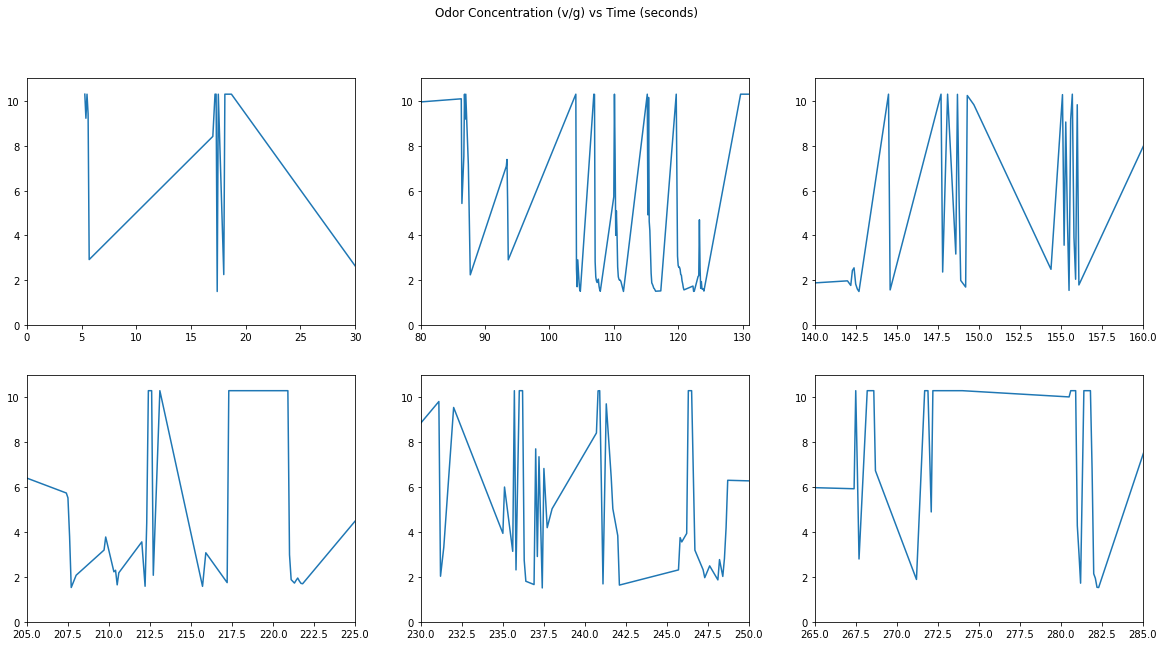

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(20,10))
fig.suptitle('Odor Concentration (v/g) vs Time (seconds)')
ax1.plot(df.time, df.odor)
ax1.set_xlim(0,30) #time
ax1.set_ylim(0,11) #voltage

ax2.plot(df.time, df.odor)
ax2.set_xlim(80,131)
ax2.set_ylim(0,11)

ax3.plot(df.time, df.odor)
ax3.set_xlim(140,160)
ax3.set_ylim(0,11)

ax4.plot(df.time, df.odor)
ax4.set_xlim(205,225)
ax4.set_ylim(0,11)

ax5.plot(df.time, df.odor)
ax5.set_xlim(230,250)
ax5.set_ylim(0,11)

ax6.plot(df.time, df.odor)
ax6.set_xlim(265,285)
ax6.set_ylim(0,11) #lower concentration

# fig.text(0.5, 0.04, 'Time', ha='center')
# fig.text(0.08, 0.5, 'Odor Concentration', va='center', rotation='vertical')

In [37]:
query = 'odor>1.5'
df = df.query(query)
fdf = pd.DataFrame()
df = df.reset_index()

In [38]:
df

,index,master_time,time,xsrc,ysrc,odor,trisonica_u,trisonica_v,trisonica_pressure,trisonica_temperature,imu_angular_x,imu_angular_y,imu_angular_z,imu_linear_acc_x,imu_linear_acc_y,imu_linear_acc_z,U,V,D,S2
0,53,1.603226e+09,5.300147,1.256816,5.834206,10.288665,2.471592,1.184043,884.200012,11.060751,0.090829,-0.128145,0.049040,-8.442018,-8.442018,-8.442018,0.699994,0.699998,224.999752,0.989995
1,54,1.603226e+09,5.400149,1.121134,5.809774,9.217212,2.218939,1.268849,884.182560,11.101403,0.042453,0.098468,0.172417,-11.197113,-11.197113,-11.197113,0.390010,0.619997,212.000591,0.740005
2,55,1.603226e+09,5.500152,0.985358,5.785344,10.288665,1.971505,1.305865,884.119533,11.206470,-0.046276,0.024661,0.234354,-12.256566,-12.256566,-12.256566,0.909993,0.470003,242.999580,1.019997
3,56,1.603226e+09,5.600155,0.845458,5.761016,9.410668,2.066314,1.374288,884.200012,11.433686,-0.087037,-0.023521,0.167271,-10.200036,-10.200036,-10.200036,0.549999,0.640001,220.999924,0.850000
4,57,1.603226e+09,5.700158,0.705654,5.736808,2.926176,2.053496,1.421261,884.200012,10.954823,-0.128744,-0.038355,0.173157,-8.633687,-8.633687,-8.633687,0.510000,0.679998,217.000076,0.849999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2823,1.603226e+09,282.307807,0.501599,4.341554,1.525863,0.185555,-1.680739,884.099976,11.727412,0.102833,0.208472,-0.181142,-9.874624,-9.874624,-9.874624,-0.960279,1.818911,152.324040,2.063240
313,2863,1.603226e+09,286.307918,-0.563069,0.803056,10.288665,1.950356,0.196243,884.099976,11.636112,-0.000244,0.055743,0.534149,-11.263850,-11.263850,-11.263850,-0.897825,1.863518,154.513854,2.072431
314,2864,1.603226e+09,286.407921,-0.584163,0.803575,6.048886,2.019920,-0.131596,884.099976,10.958737,-0.030520,0.007005,0.341173,-10.860576,-10.860576,-10.860576,-1.100810,1.790000,148.918976,2.100000
315,2865,1.603226e+09,286.507924,-0.606900,0.806372,1.997737,2.362060,0.066219,884.099976,11.505072,-0.070935,-0.159404,0.063949,-9.922742,-9.922742,-9.922742,-1.114051,1.780277,147.756927,2.095139


In [39]:
## The above is a much time taking process, getting the index and then use the index to get the features
## will be less verbose and one time 
idx = ([df.index[(df['time']>=5)   &(df['time'] <= 35) ],
        df.index[(df['time']>=42)  & (df['time']< 85)  ],
        df.index[(df['time']>=90)  & (df['time']< 130) ],
        df.index[(df['time']>=142) & (df['time']< 160) ],
        df.index[(df['time']>=173) & (df['time']< 190) ],
        df.index[(df['time']>=205) & (df['time']< 222) ],
        df.index[(df['time']>=230) & (df['time']< 240) ],
        df.index[(df['time']>=245) & (df['time']< 268) ],
        df.index[(df['time']>=270) & (df['time']< 280) ],
        df.index[(df['time']>=281) & (df['time']< 289) ]])

feature_range = np.array([[5,35],[42,85],[90,130],[142,160],[173,190], 
                          [205,222],[230,240],[245,268],[270,280],[281,289]])

In [40]:
# mean odor concentration
i = 0
concentration = []
while i<len(idx):
    concentration.append(np.mean(df.odor[idx[i]]))
    i+=1
fdf['odor'] = concentration

# time of the encounters
fdf['odor_intermittency'] = abs(feature_range[:,0]-feature_range[:,1])

## Odor Standard Deviation
i = 0
st_dev = []
while i<10:
    st_dev.append(np.std(df.odor[idx[i]]))
    i+=1
fdf['odor_stdev'] = st_dev

## Trisonica Mean Pressure
i = 0
pressure = []
while i<10:
    pressure.append(np.mean(df.trisonica_pressure[idx[i]]))
    i+=1
fdf['tri_pressure'] = pressure

## Trisonica Mean Temperature
i = 0
temperature = []
while i<10:
    temperature.append(np.mean(df.trisonica_temperature[idx[i]]))
    i+=1
fdf['tri_temperature'] = temperature

## Trisonica Mean Linear acceleration
i = 0
linear_acc_x = []
while i<10:
    linear_acc_x.append(np.mean(df.imu_linear_acc_x[idx[i]]))
    i+=1
fdf['linear_acc_x'] = linear_acc_x

i = 0
linear_acc_y = []
while i<10:
    linear_acc_y.append(np.mean(df.imu_linear_acc_y[idx[i]]))
    i+=1
fdf['linear_acc_y'] = linear_acc_y

i = 0
linear_acc_z = []
while i<10:
    linear_acc_z.append(np.mean(df.imu_linear_acc_z[idx[i]]))
    i+=1
fdf['linear_acc_z'] = linear_acc_z

## Trisonica Mean Angular vel
i = 0
angular_vel_x = []
while i<10:
    angular_vel_x.append(np.mean(df.imu_angular_x[idx[i]]))
    i+=1
fdf['imu_angular_x'] = angular_vel_x

i = 0
angular_vel_y = []
while i<10:
    angular_vel_y.append(np.mean(df.imu_angular_y[idx[i]]))
    i+=1
fdf['imu_angular_y'] = angular_vel_y

i = 0
angular_vel_z = []
while i<10:
    angular_vel_z.append(np.mean(df.imu_angular_z[idx[i]]))
    i+=1
fdf['imu_angular_z'] = angular_vel_z



##TODO: more features
fdf

,odor,odor_intermittency,odor_stdev,tri_pressure,tri_temperature,linear_acc_x,linear_acc_y,linear_acc_z,imu_angular_x,imu_angular_y,imu_angular_z
0,8.022731,30,3.420459,884.182707,11.205235,-9.806386,-9.806386,-9.806386,-0.010531,0.000179,-0.097896
1,8.570673,43,2.680142,884.130836,11.057214,-10.026285,-10.026285,-10.026285,-0.018096,0.026276,-0.059142
2,3.470717,40,2.778715,884.132575,11.534308,-9.996625,-9.996625,-9.996625,-0.007559,-0.000304,-0.174300
3,5.163012,18,3.692608,884.105430,11.282408,-9.912779,-9.912779,-9.912779,-0.011585,-0.021864,0.056492
4,6.166089,17,3.923484,884.104762,11.045928,-10.034322,-10.034322,-10.034322,0.092378,-0.007563,-0.075919
5,4.407892,17,3.422052,884.099976,11.315734,-9.912844,-9.912844,-9.912844,0.048114,-0.010386,0.119411
6,5.588417,10,3.249713,884.099976,11.762938,-9.772211,-9.772211,-9.772211,0.003538,0.016708,-0.054774
7,4.763776,23,2.992897,884.097399,12.096188,-10.095714,-10.095714,-10.095714,0.008828,-0.028704,0.020241
8,8.317022,10,3.219263,884.099976,11.663719,-10.281488,-10.281488,-10.281488,0.044789,0.161118,-0.361105
9,5.551433,8,3.792452,884.099976,11.275238,-9.742285,-9.742285,-9.742285,-0.036867,-0.072850,-0.009298


### Finding odor encounter distance from source

In [ ]:
# df_pos['time'] = df_tmp['time']
# df_pos['distance']=hp.haversine_distance(df_tmp._ublox_gps_fix_latitude.astype(float),df_tmp._ublox_gps_fix_longitude.astype(float), 39.67650835454546,-119.82060767454543)
# df_pos['odor_concentration'] = df_tmp['_analog_output_data']